<a href="https://colab.research.google.com/github/NityaVerma19/Customer-Purchase-Decision-/blob/master/Consumer_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split


#Generating a dataset

In [81]:
df = pd.read_csv("/content/consumer behaviour.csv")

In [82]:
df.head()

,age,income,gender,price,product,green_pack,purchase
0,30,45000,M,1200,Beverage,1,1
1,45,80000,F,3500,Clothing,0,0
2,55,110000,M,2500,Beauty,1,1
3,40,60000,F,700,Food,0,1
4,25,30000,M,800,Personal hygiene,1,0


In [83]:
df.shape

(256, 7)

In [84]:
df['product'].unique()

array(['Beverage', 'Clothing', 'Beauty', 'Food', 'Personal hygiene',
       'Paper products'], dtype=object)

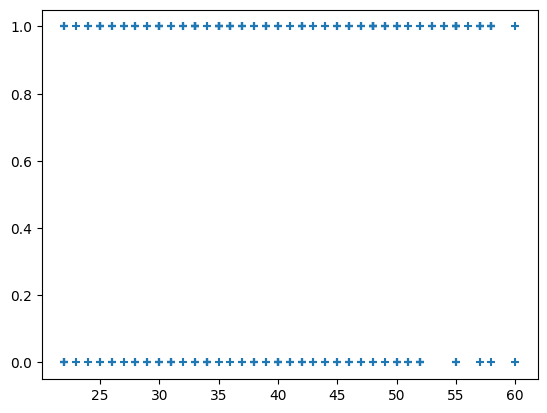

In [85]:
plt.scatter(df.age, df.purchase, marker = "+")

In [109]:
df.corr()

<ipython-input-109-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,income,price,green_pack,purchase
age,1.000000,0.933182,0.842078,-0.262613,0.082659
income,0.933182,1.000000,0.891151,-0.269323,0.098181
price,0.842078,0.891151,1.000000,-0.293047,0.065726
green_pack,-0.262613,-0.269323,-0.293047,1.000000,0.093953
purchase,0.082659,0.098181,0.065726,0.093953,1.000000



---





# Logistic Regression


In [86]:
#feature variable

X = df.drop(columns = ['purchase'], axis= 1)


#target variable

y = df.purchase.values



In [87]:
X.head()

,age,income,gender,price,product,green_pack
0,30,45000,M,1200,Beverage,1
1,45,80000,F,3500,Clothing,0
2,55,110000,M,2500,Beauty,1
3,40,60000,F,700,Food,0
4,25,30000,M,800,Personal hygiene,1


In [88]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((204, 6), (52, 6))

*204 rows in training dataset*
*52 rows in testiing dataset*

*Feature engineering*

In [90]:
# display categorical variables
for col in X_train.columns:
  if X_train[col].dtypes == 'O':
    print(col)

gender
product


In [91]:
#display numerical variables

for col in X_train.columns:
  if X_train[col].dtypes != 'O':
    print(col)

age
income
price
green_pack


In [92]:
X_train.describe()

,age,income,price,green_pack
count,204.000000,204.000000,204.000000,204.000000
mean,39.911765,71975.490196,2012.745098,0.519608
std,10.475966,27528.120638,1122.907167,0.500844
min,22.000000,25000.000000,300.000000,0.000000
25%,31.000000,48000.000000,1075.000000,0.000000
50%,39.000000,70000.000000,1800.000000,1.000000
75%,49.000000,90000.000000,2800.000000,1.000000
max,60.000000,130000.000000,4800.000000,1.000000


In [93]:
cols = X_train.columns
cols                #everything except purchase

Index(['age', 'income', 'gender', 'price', 'product', 'green_pack'], dtype='object')

In [94]:
pip install category_encoders

*Endoding categorical variable*

In [95]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['product', 'gender'])        #The BinaryEncoder is a type of categorical encoding technique that represents each category as a binary number

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [96]:
X_train.head()

,age,income,gender_0,gender_1,price,product_0,product_1,product_2,green_pack
159,44,85000,0,1,2500,0,0,1,1
76,33,55000,1,0,1200,0,0,1,1
59,30,45000,1,0,1200,0,0,1,1
215,55,120000,0,1,3800,0,1,0,0
232,37,68000,0,1,1800,0,0,1,1


In [97]:
X_train = pd.concat([X_train[numerical], X_train[['product_0', 'product_1', 'product_2', 'gender_0', 'gender_1']]], axis=1)

X_train.head()


,age,income,price,green_pack,product_0,product_1,product_2,gender_0,gender_1
159,44,85000,2500,1,0,0,1,0,1
76,33,55000,1200,1,0,0,1,1,0
59,30,45000,1200,1,0,0,1,1,0
215,55,120000,3800,0,0,1,0,0,1
232,37,68000,1800,1,0,0,1,0,1


In [98]:
X_test = pd.concat([X_test[numerical], X_test[['product_0', 'product_1', 'product_2', 'gender_0', 'gender_1']]], axis=1)

X_test.head()


,age,income,price,green_pack,product_0,product_1,product_2,gender_0,gender_1
158,26,45000,800,1,0,1,1,1,0
83,31,40000,900,1,1,1,0,0,1
170,37,56000,1200,1,0,1,1,0,1
101,42,35000,800,1,0,0,1,0,1
150,22,34000,700,1,0,1,0,1,0


*Feature Scaling*

In [99]:
cols = X_train.columns

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [101]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [102]:
X_test = pd.DataFrame(X_test, columns=[cols])

*Model Training*

In [103]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(C = 0.5, solver='liblinear', random_state=1)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=1, solver='liblinear')

*Predict Results*

In [104]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
# probability of getting output as 0 - no purchase

logreg.predict_proba(X_test)[:,0]

array([0.34177056, 0.24108773, 0.21766495, 0.27839784, 0.43712078,
       0.40659047, 0.36852167, 0.28325325, 0.35402746, 0.20379055,
       0.30732813, 0.30975334, 0.27500854, 0.33133274, 0.375527  ,
       0.34575836, 0.22792369, 0.49362229, 0.31719258, 0.2238698 ,
       0.39553361, 0.41070603, 0.28846878, 0.39980554, 0.48418636,
       0.35139099, 0.25637016, 0.32085008, 0.34935226, 0.5222142 ,
       0.32355213, 0.40925082, 0.21969512, 0.54116322, 0.28756359,
       0.19916904, 0.35027953, 0.53238129, 0.25111075, 0.41638176,
       0.42217404, 0.25817713, 0.35202784, 0.52740131, 0.42168073,
       0.3410192 , 0.29465425, 0.20428966, 0.39585188, 0.31313431,
       0.25922647, 0.24218656])

In [106]:
# probability of getting output as 1 - purchase

logreg.predict_proba(X_test)[:,1]

array([0.65822944, 0.75891227, 0.78233505, 0.72160216, 0.56287922,
       0.59340953, 0.63147833, 0.71674675, 0.64597254, 0.79620945,
       0.69267187, 0.69024666, 0.72499146, 0.66866726, 0.624473  ,
       0.65424164, 0.77207631, 0.50637771, 0.68280742, 0.7761302 ,
       0.60446639, 0.58929397, 0.71153122, 0.60019446, 0.51581364,
       0.64860901, 0.74362984, 0.67914992, 0.65064774, 0.4777858 ,
       0.67644787, 0.59074918, 0.78030488, 0.45883678, 0.71243641,
       0.80083096, 0.64972047, 0.46761871, 0.74888925, 0.58361824,
       0.57782596, 0.74182287, 0.64797216, 0.47259869, 0.57831927,
       0.6589808 , 0.70534575, 0.79571034, 0.60414812, 0.68686569,
       0.74077353, 0.75781344])

### Checking Accuracy

In [107]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5769


In [108]:
logreg.score(X_test,y_test)


0.5769230769230769